
<h1><center> What Factors Impact China's Economy？<br><br>
<h1><center>A Case Study on 2012-2016 Anti-Corruption Campaign under Xi Jinping<br><br><font color='grey'> Data Science I: Foundations</font></center><h1><font color='grey'> Feier Wu </font></center><h1>
    

### Background
- As an autocratic government, Beijing lacks confidence in legitimacy due to lack of universal suffrage.
- Chinese Communist Party (CCP), the supreme power over Chinese government branches, seeks  domestic stability in implementing policies.  
- China's domestic and international legitimacy are dependent on economic performance 

### Background cont.
- CCP launched an anti-corruption campaign, aiming to eliminate “tigers” (high-ranking corrupt officials) and “flies” (low-ranking corrupt officials) since Xi Jinping took power in 2012.
- The massive anti-corruption campaign was believed to change the structure of CCP, reducing bureaucratic opportunities for corruption and structural obstacles to anti-corruption enforcement (Wang&Dickson, 2020). 
- However, it is believed removing a large number of officials might disrupt government activities, bring political uncertainty, and subsequently harm economic growth 
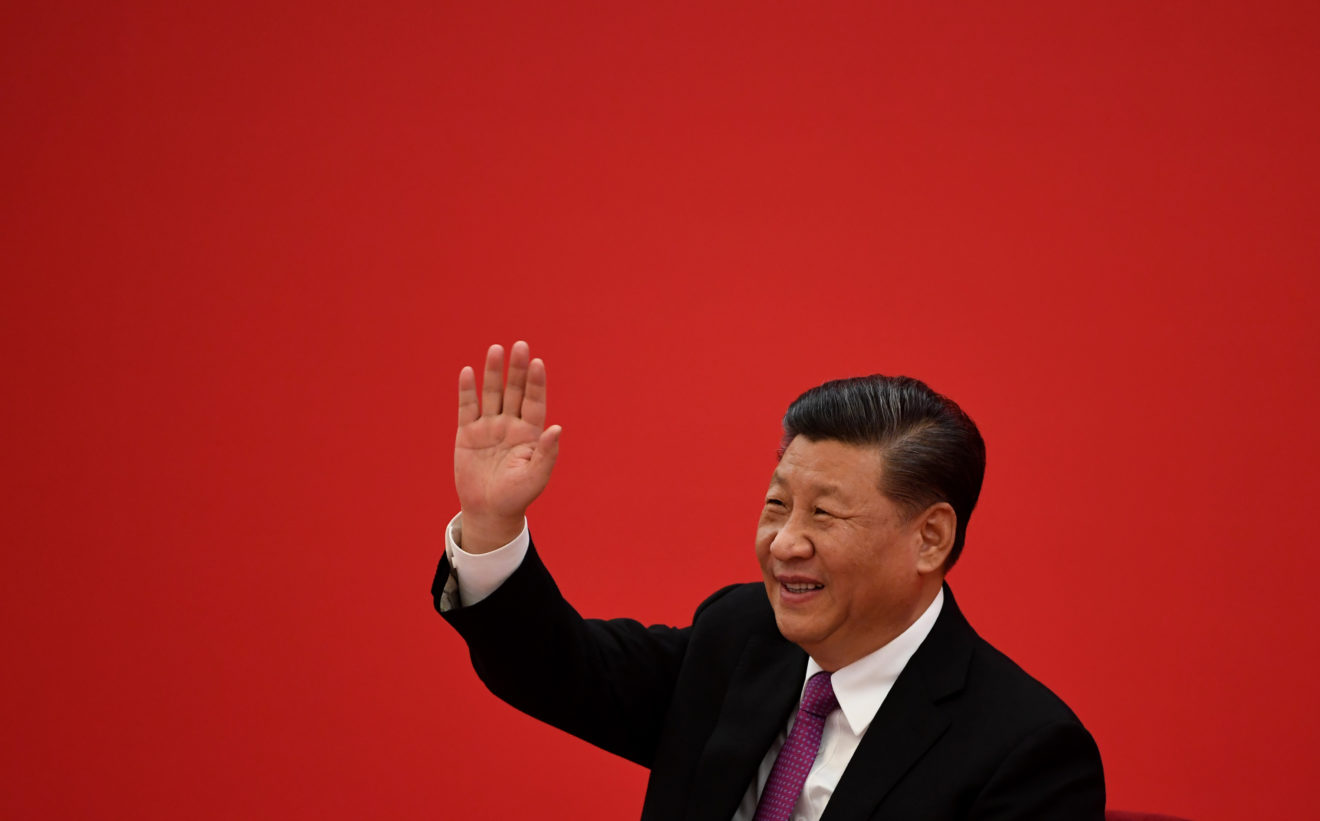

### Data Source
- China’s Corruption Investigations Dataset collected by Yuhua Wang in 2020
    - Ranking of Officials
    - Number of investigation cases (number of fall officials)
    - Data collected by provinces and municipalities  
- Annual Gross Regional Product by Province collected by the National Bureau of Statistics of China (Local-level economic indicator)
- Economic related regional indicators (9) collected by the National Bureau of Statistics of China

### Method
- Data wrangling
- Linear Regression Model
- Comparing and Tuning Models

### Data wrangling
- Converting province zip code to romanization system for Standard Mandarin Chinese
- Merging dataframes 
- Data cleaning: Removing misinformations

### Linear Regression Model
- Looking specifically at the relationship between the number of investigations and Annual Gross Regional Product by Province 
- Delving into other possible factors that might impact economic performance

### Comparing and Tuning Models
- Using different models to predict economic performance with other economic indicators

- *note: Although the investigation data ends at 2016, it does not mean the campign ends in 2016. The anti-corruption campaign is periodic and has several phases. The 2012-2016 is the first phase and peak of the campaign under Xi, and this movement has continued since 2016.   

### Visualizations
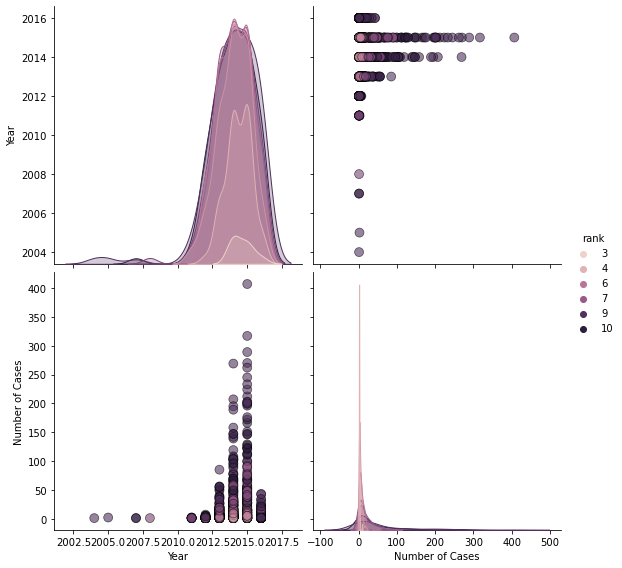  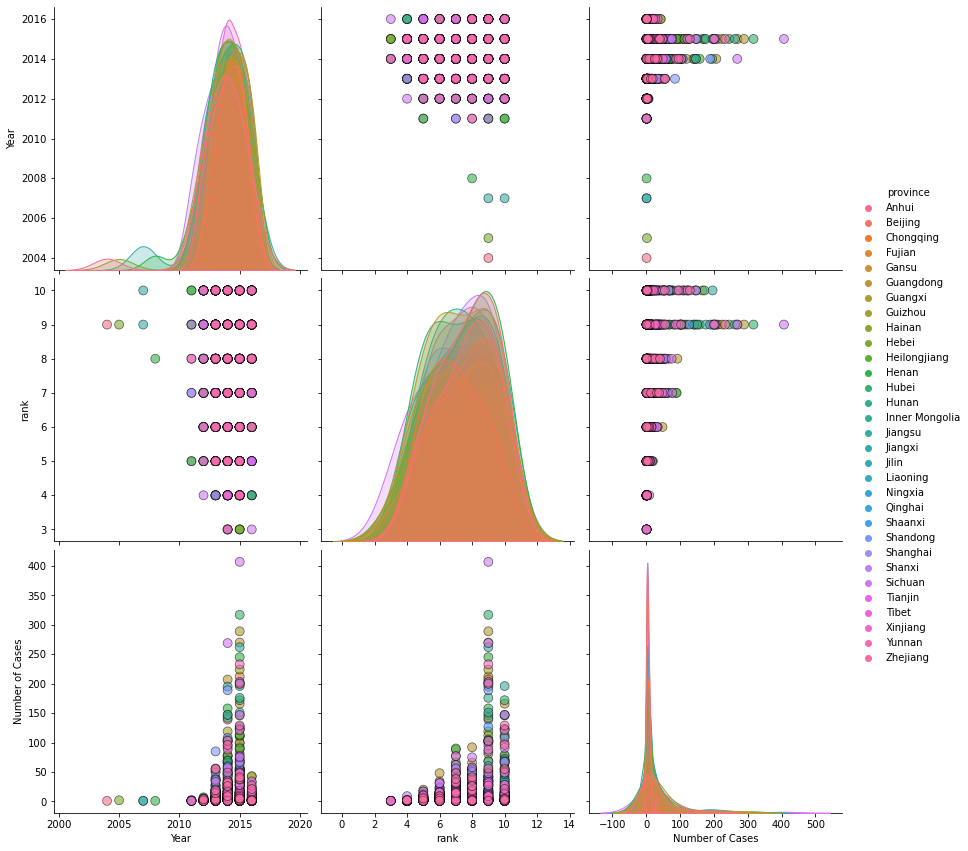

### Visualizations cont.
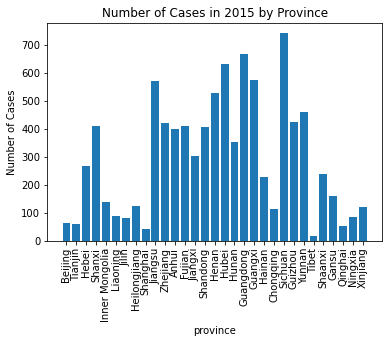   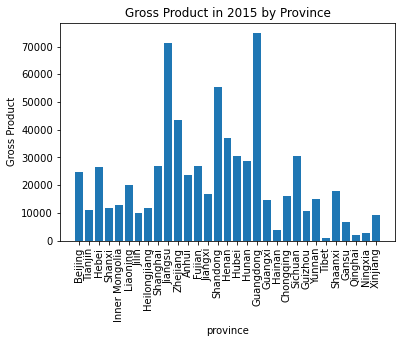



### Preliminary Findings
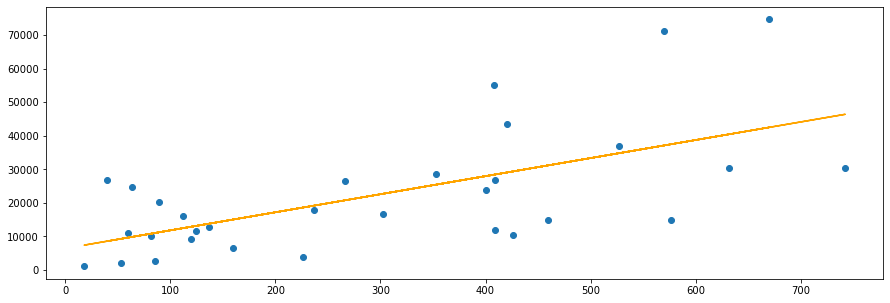

In [2]:
#Set up
import pandas as pd
import numpy as np
from datetime import date
!pip install plotnine
import seaborn as sns
!pip install matplotlib
!pip install missingpy
!pip install ggplot
!pip install pandas plotnine

In [3]:
!pip install dfply

In [7]:
from dfply import *

In [8]:
from plotnine import *

In [9]:
!pip install pyshp

In [4]:
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install geopandas

In [22]:
import geopandas

In [7]:
df_clean=pd.read_csv("~/Desktop/Final data/Final_Project_Clean.csv")
df_clean

,Unnamed: 0,province,Year,Gross Product,Number of Industrial Enterprises,Average Wage,Budgetary Expenditure,Population_Density,Urban Area,Number of Cities,Unemployment Rate,Population,Number of Employed Population,Number of Cases
0,124,Beijing,2016,27041.2,3340.0,119928.0,6406.77,1145.0,16410.0,1.0,1.4,2195,791.5,5.0
1,125,Tianjin,2016,11477.2,5203.0,86305.0,3699.43,3639.0,2583.0,1.0,3.5,1443,286.0,1.0
2,126,Hebei,2016,28474.1,14764.0,55334.0,6049.53,2659.0,6613.0,11.0,3.7,7375,639.6,2.0
3,127,Shanxi,2016,11946.4,3548.0,53705.0,3428.86,3908.0,2893.0,11.0,3.5,3514,430.6,2.0
4,128,Inner Mongolia,2016,13789.3,4289.0,61067.0,4512.71,1822.0,4872.0,9.0,3.6,2436,293.2,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,274,Shaanxi,2012,14142.4,4284.0,43073.0,3323.80,5483.0,1504.0,10.0,3.2,3787,411.2,1.0
151,275,Gansu,2012,5393.1,1735.0,37679.0,2059.56,4369.0,1292.0,12.0,2.7,2550,211.3,1.0
152,276,Qinghai,2012,1528.5,423.0,46483.0,1159.05,2674.0,512.0,1.0,3.4,571,61.7,0.0
153,277,Ningxia,2012,2131.0,865.0,47436.0,864.36,1251.0,2103.0,5.0,4.2,659,67.4,0.0


In [8]:
df=pd.read_csv("~/Desktop/Final data/Final_Project.csv")

In [25]:
df_Cases=df_clean.filter(['Number of Cases','province'], axis=1)
df_Cases

,Number of Cases,province
0,5.0,Beijing
1,1.0,Tianjin
2,2.0,Hebei
3,2.0,Shanxi
4,11.0,Inner Mongolia
...,...,...
150,1.0,Shaanxi
151,1.0,Gansu
152,0.0,Qinghai
153,0.0,Ningxia


In [9]:
CI=pd.read_csv("~/Desktop/Final data/CorruptionIndex.csv")
CI

,Unnamed: 0,province,rank,Year
0,0,Beijing,10,2012
1,1,Beijing,9,2012
2,2,Beijing,5,2012
3,3,Beijing,8,2012
4,4,Beijing,9,2012
...,...,...,...,...
17509,18918,Xinjiang,9,2016
17510,18919,Xinjiang,9,2016
17511,18920,Xinjiang,9,2016
17512,18921,Xinjiang,9,2016


In [255]:
n_by_rank = \
(CI
 .filter(["province","Year","rank"])
 .groupby(["Year","rank","province"])
 .size() # We can count the number of observations using the size method
 .reset_index()
 .rename(columns={0:"Number of Cases"})
) 
n_by_rank
n_by_rank=n_by_rank.drop(index=n_by_rank[n_by_rank['Year'] == 2004].index)
n_by_rank=n_by_rank.drop(index=n_by_rank[n_by_rank['Year'] == 2005].index)
n_by_rank=n_by_rank.drop(index=n_by_rank[n_by_rank['Year'] == 2007].index)
n_by_rank=n_by_rank.drop(index=n_by_rank[n_by_rank['Year'] == 2008].index)
n_by_rank=n_by_rank.drop(index=n_by_rank[n_by_rank['Year'] == 2011].index)
n_by_rank

,Year,rank,province,Number of Cases
16,2012,4,Sichuan,1
17,2012,5,Beijing,1
18,2012,5,Chongqing,1
19,2012,5,Henan,1
20,2012,5,Jiangxi,1
...,...,...,...,...
761,2016,10,Shaanxi,10
762,2016,10,Shandong,4
763,2016,10,Sichuan,12
764,2016,10,Yunnan,21


In [23]:
#First look at the relationship between Gross Production and Investigation cases
df_map = geopandas.read_file('~/Desktop/chn_adm_ocha_2020_shp/chn_admbnda_adm1_ocha_2020.shp')
df_map



,ADM1_EN,ADM1_ZH,ADM1_PCODE,ADM0_EN,ADM0_ZH,ADM0_PCODE,geometry
0,Shaanxi Province,陕西省,CN061,China,中国,CN,"POLYGON ((109.43453 33.15591, 109.43417 33.153..."
1,Shanghai Municipality,上海市,CN031,China,中国,CN,"MULTIPOLYGON (((121.24731 31.73074, 121.24566 ..."
2,Chongqing Municipality,重庆市,CN050,China,中国,CN,"POLYGON ((109.54600 31.72161, 109.56352 31.718..."
3,Zhejiang Province,浙江省,CN033,China,中国,CN,"MULTIPOLYGON (((120.46805 27.16108, 120.46718 ..."
4,Jiangxi Province,江西省,CN036,China,中国,CN,"POLYGON ((116.53885 26.56975, 116.55643 26.540..."
5,Yunnan Province,云南省,CN053,China,中国,CN,"POLYGON ((105.51205 23.20864, 105.49400 23.230..."
6,Shandong Province,山东省,CN037,China,中国,CN,"MULTIPOLYGON (((120.27662 36.00127, 120.27536 ..."
7,Liaoning Province,辽宁省,CN021,China,中国,CN,"MULTIPOLYGON (((121.42978 39.50441, 121.42695 ..."
8,Tibet Autonomous Region,西藏自治区,CN054,China,中国,CN,"POLYGON ((90.12055 28.17220, 90.11962 28.17022..."
9,Gansu province,甘肃省,CN062,China,中国,CN,"POLYGON ((106.50714 34.22042, 106.55785 34.190..."


In [26]:

merged = pd.concat([df_Cases, df_map.reindex(df_Cases.index)], axis=1)
print(merged.head)


<bound method NDFrame.head of      Number of Cases        province                 ADM1_EN ADM1_ZH  \
0                5.0         Beijing        Shaanxi Province     陕西省   
1                1.0         Tianjin   Shanghai Municipality     上海市   
2                2.0           Hebei  Chongqing Municipality     重庆市   
3                2.0          Shanxi       Zhejiang Province     浙江省   
4               11.0  Inner Mongolia        Jiangxi Province     江西省   
..               ...             ...                     ...     ...   
150              1.0         Shaanxi                     NaN     NaN   
151              1.0           Gansu                     NaN     NaN   
152              0.0         Qinghai                     NaN     NaN   
153              0.0         Ningxia                     NaN     NaN   
154              1.0        Xinjiang                     NaN     NaN   

    ADM1_PCODE ADM0_EN ADM0_ZH ADM0_PCODE  \
0        CN061   China      中国         CN   
1        CN031 

In [27]:
from geopandas import GeoDataFrame

In [28]:
merged = GeoDataFrame(merged)

Text(0.5, 0.98, 'Pair Plot for Ranks of Officials Investigated Each Year')

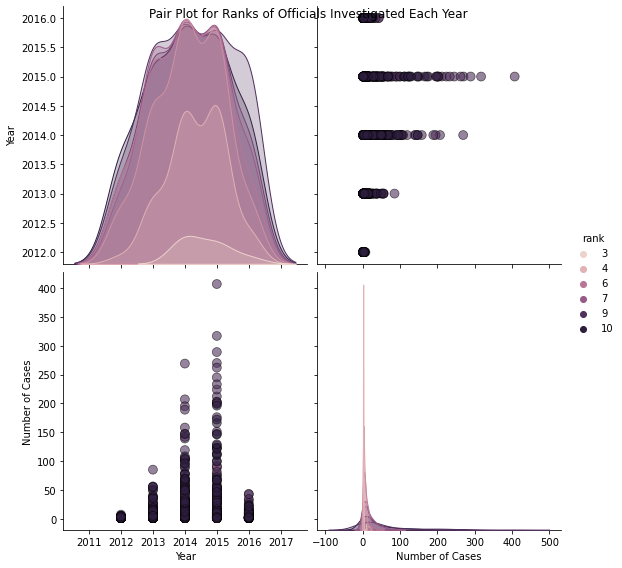

In [259]:
#Visulization

g=sns.pairplot(n_by_rank, hue = 'rank', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
g.fig.suptitle("Pair Plot for Ranks of Officials Investigated Each Year")

Text(0.5, 0.98, 'Pair Plot for numbers of Officals Investigated Each Year by Province')

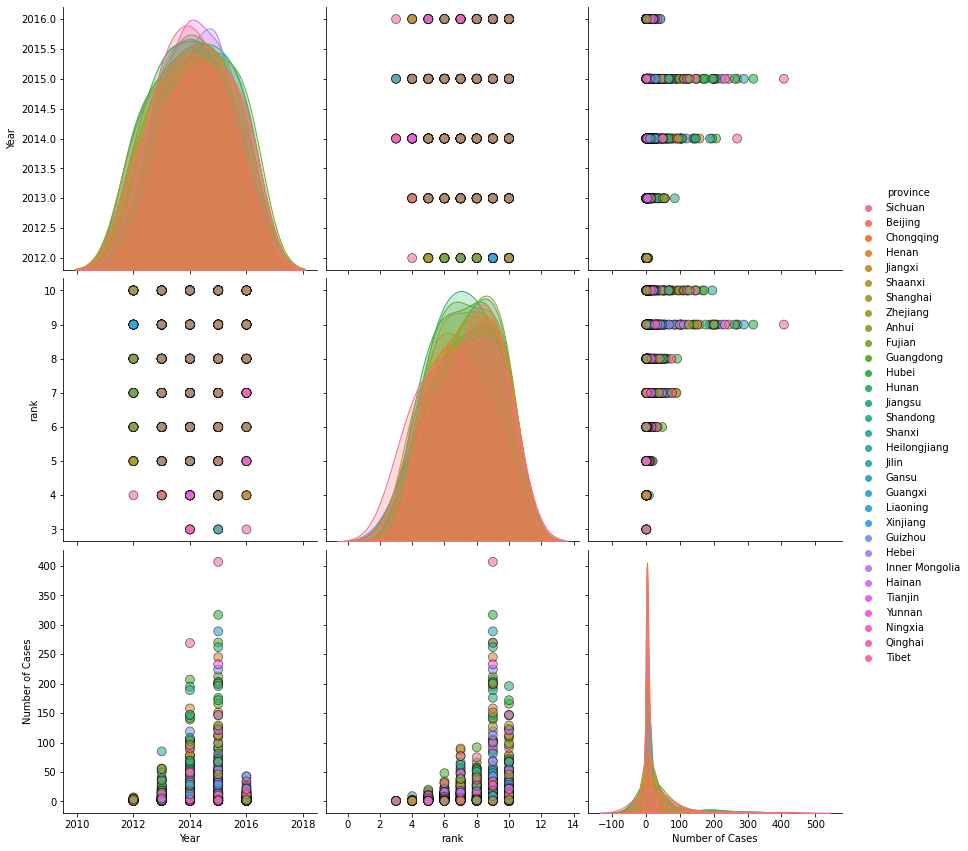

In [258]:
sns.pairplot(n_by_rank, hue = 'province', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
g.fig.suptitle("Pair Plot for numbers of Officals Investigated Each Year by Province")

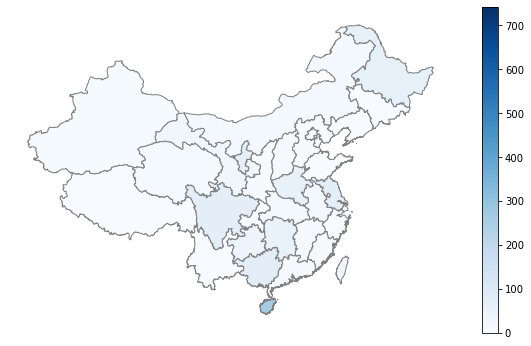

In [34]:
fig, ax = plt.subplots(1, figsize=(10,6))
merged.plot(column='Number of Cases', cmap='Blues',  linewidth=1, ax=ax, edgecolor='0.5', legend=True)
ax.axis('off')
plt.show()

In [54]:
df_2015=df_clean.loc[df_clean['Year'] == 2015]
df_2015
cases_2015=df_2015.filter(['Number of Cases','province'], axis=1)
cases_2015

,Number of Cases,province
31,64.0,Beijing
32,60.0,Tianjin
33,266.0,Hebei
34,409.0,Shanxi
35,137.0,Inner Mongolia
36,89.0,Liaoning
37,82.0,Jilin
38,124.0,Heilongjiang
39,40.0,Shanghai
40,570.0,Jiangsu


In [174]:
cases_2015.province = cases_2015.province.astype("category")

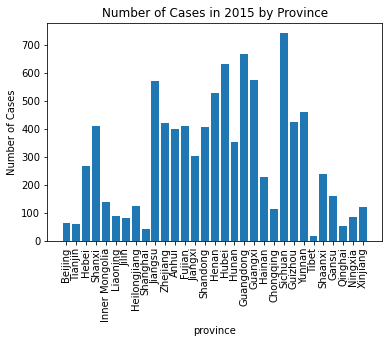

In [188]:

                     
plt.bar(cases_2015["province"], cases_2015["Number of Cases"])

plt.xlabel('province')

plt.ylabel('Number of Cases')

plt.title('Number of Cases in 2015 by Province')

plt.xticks(rotation=90)

plt.show()


In [189]:
gross_2015=df_2015.filter(['Gross Product','province'], axis=1)

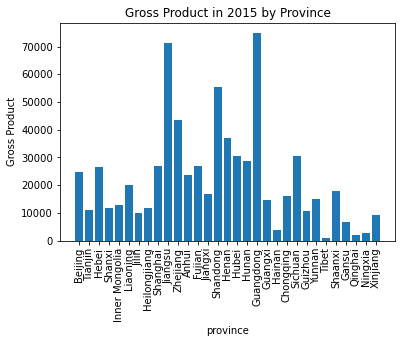

In [191]:
plt.bar(gross_2015["province"], gross_2015["Gross Product"])

plt.xlabel('province')

plt.ylabel('Gross Product')

plt.title('Gross Product in 2015 by Province')

plt.xticks(rotation=90)

plt.show()

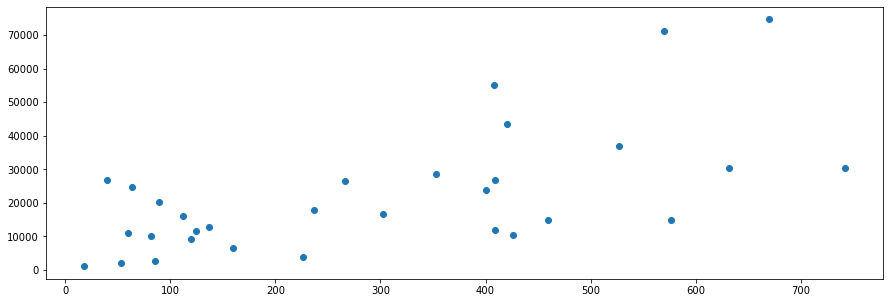

In [195]:
#Building the model
plt.figure(figsize=(15,5))
plt.scatter(df_2015["Number of Cases"],df_2015["Gross Product"])
plt.show()

In [12]:
import numpy.linalg as la

In [216]:
y = df_2015["Gross Product"] 
x = df_2015["Number of Cases"]
N = 31
X  = np.vstack([np.ones(N),x]).T
X[1:5,:]

array([[  1.,  60.],
       [  1., 266.],
       [  1., 409.],
       [  1., 137.]])

In [215]:
B = la.inv(X.T.dot(X)).dot(X.T.dot(y))
B

array([6424.84645772,   53.88750652])

In [217]:
y_hat = X.dot(B)

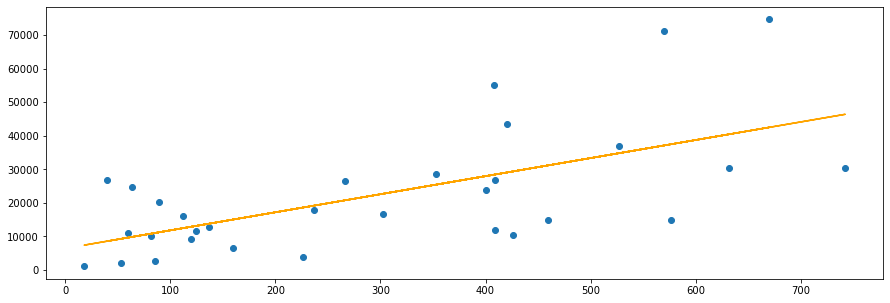

In [218]:
plt.figure(figsize=(15,5))
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_hat,color="orange")
plt.show()

In [219]:
e = y - y_hat

In [220]:
(e.T.dot(e))/N

197736121.73845318

In [221]:
y_hat_center = y_hat - y_hat.mean()
y_center = y - y.mean()

# R Squared
r_squared = y_hat_center.dot(y_hat_center)/y_center.dot(y_center)
r_squared

0.3921041566543627

In [222]:
1 - (e.dot(e)/y_center.dot(y_center))

0.39210415665436305

In [223]:
n = X.shape[0]
p = X.shape[1]
sigma2 = e.T.dot(e)/(n-p)
sigma2

211373095.65144995

In [224]:
cov_B = sigma2*la.inv(X.T.dot(X))
cov_B

array([[ 2.04200660e+07, -4.59512804e+04],
       [-4.59512804e+04,  1.55240812e+02]])

In [16]:
import statsmodels.formula.api as smf

### Preliminary Findings cont.

In [227]:
model = smf.ols('y ~ x', data=pd.DataFrame(dict(y=y,x=X[:,1]))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     18.71
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           0.000165
Time:                        16:01:44   Log-Likelihood:                -340.07
No. Observations:                  31   AIC:                             684.1
Df Residuals:                      29   BIC:                             687.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6424.8465   4518.857      1.422      0.166   -2817.253    1.57e+04
x             53.8875     12.460      4.325      0.000      28.405      79.370
==============================================================================
Omnibus:                        4.336   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.265
Skew:                           0.790   Prob(JB):                        0.195
Kurtosis:                       3.170   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
!pip install RISE

     |████████████████████████████████| 4.3 MB 4.0 MB/s eta 0:00:01


### Next Step?
- Challenges
  - linear model built on certain year is not enough: low R-squared value
  - Potential multicollinearity
- Next step:
  - Be more specific on selecting predictors
  - Using data from 2012-2016 or a wider range

### Reference
- Wang, Y., & Dickson, B. (2020). How Corruption Investigations Undermine Regime Support: Evidence from China. SSRN Electronic Journal. doi: 10.2139/ssrn.3086286
- Alesina, A., Özler, S., Roubini, N., & Swagel, P. (1996). Political instability and economic growth. Journal Of Economic Growth, 1(2), 189-211. doi: 10.1007/bf00138862
- Wang, Yuhua, 2020, "China’s Corruption Investigations Dataset", https://doi.org/10.7910/DVN/9QZRAD, Harvard Dataverse, V4, UNF:6:pt1h9LKzO0aD6F30y7KQGg== [fileUNF]
- National Bureau of Statistics of China. (2019). Annual Gross Regional Product by Province [Data file and code book]. Retrieved from https://data.stats.gov.cn/english/easyquery.htm?cn=E0103
- https://www.politico.eu/wp-content/uploads/2021/10/07/GettyImages-1185990661-1320x821.jpg

In [10]:
x1=df_clean["Number of Cases"]
y1=df_clean["Gross Product"]
N = 155
X1  = np.vstack([np.ones(N),x1]).T
X1[1:5,:]

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1., 11.]])

In [13]:
B = la.inv(X1.T.dot(X1)).dot(X1.T.dot(y1))
B

array([16289.25553657,    40.53147138])

In [15]:
y1_hat = X1.dot(B)
y1_hat_center = y1_hat - y1_hat.mean()
y1_center = y1 - y1.mean()

# R Squared
r_squared1 = y1_hat_center.dot(y1_hat_center)/y1_center.dot(y1_center)
r_squared1

0.15137400082889582

In [18]:
model1 = smf.ols('y1 ~ x1', data=pd.DataFrame(dict(y=y1,x=X1[:,1]))).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     27.29
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.64e-07
Time:                        21:16:42   Log-Likelihood:                -1716.0
No. Observations:                 155   AIC:                             3436.
Df Residuals:                     153   BIC:                             3442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.629e+04   1532.058     10.632      0.000    1.33e+04    1.93e+04
x1            40.5315      7.759      5.224      0.000      25.204      55.859
==============================================================================
Omnibus:                       49.832   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.094
Skew:                           1.473   Prob(JB):                     3.03e-22
Kurtosis:                       5.581   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

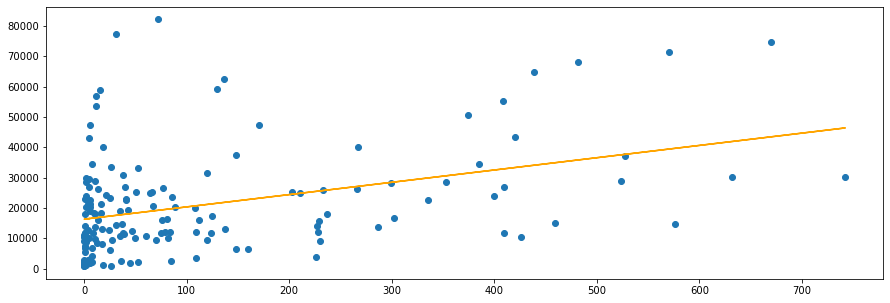

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(X1[:,1],y1)
plt.plot(X1[:,1],y1_hat,color="orange")
plt.show()

## ml Walkthrough

In [186]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules
# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

In [55]:
df_2015.dtypes

Unnamed: 0                             int64
province                            category
Year                                   int64
Gross Product                        float64
Number of Industrial Enterprises     float64
Average Wage                         float64
Budgetary Expenditure                float64
Population_Density                   float64
Urban Area                           float64
Number of Cities                     float64
Unemployment Rate                    float64
Population                             int64
Number of Employed Population        float64
Number of Cases                      float64
dtype: object

In [56]:
for col in ['province']:
    df_2015[col] = df_2015[col].astype('category')

<AxesSubplot:>

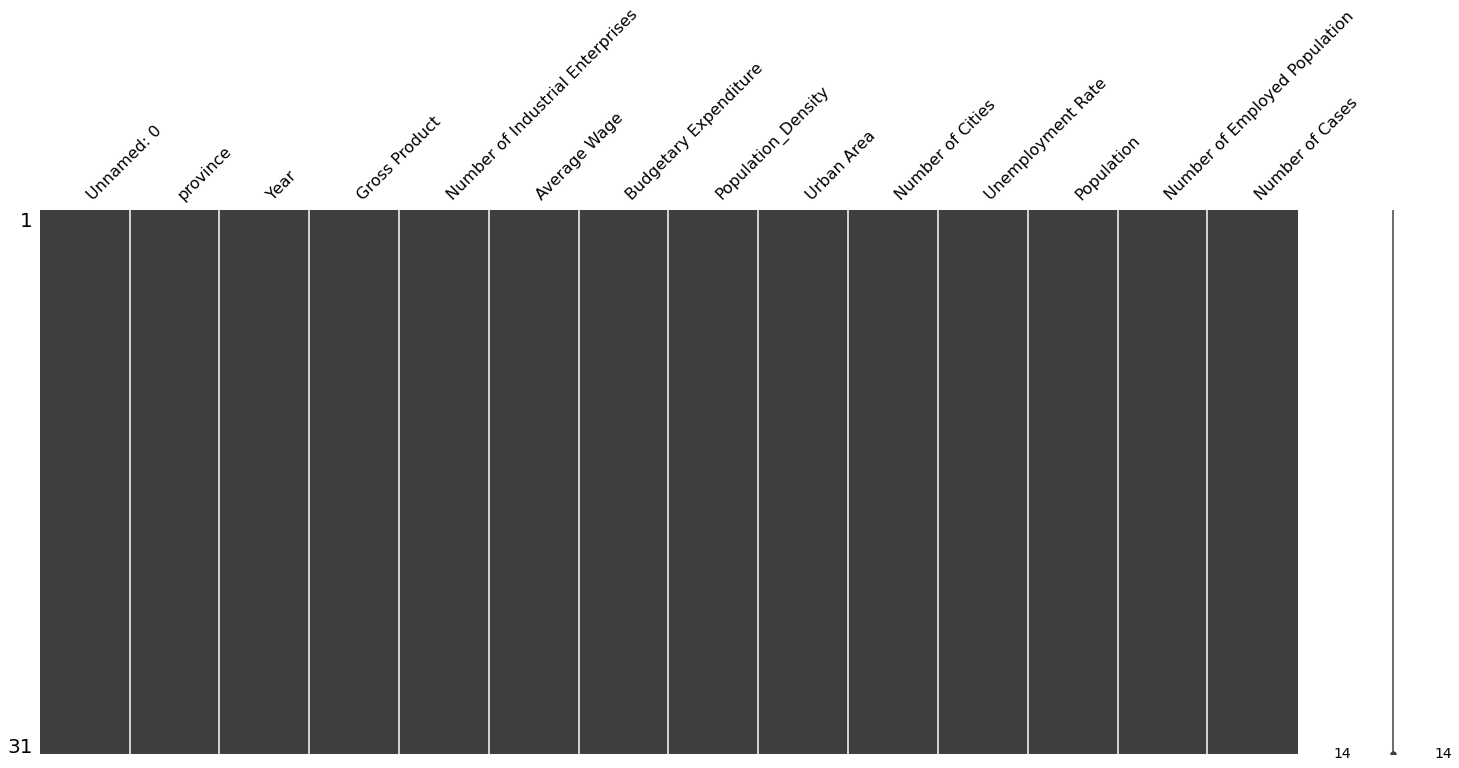

In [57]:
miss.matrix(df_2015)

In [270]:
dat=df_2015.drop(columns=['Unnamed: 0'])
dat

,province,Year,Gross Product,Number of Industrial Enterprises,Average Wage,Budgetary Expenditure,Population_Density,Urban Area,Number of Cities,Unemployment Rate,Population,Number of Employed Population,Number of Cases
31,Beijing,2015,24779.1,3548.0,111390.0,5737.70,1541.0,12187.0,1.0,1.4,2188,777.3,64.0
32,Tianjin,2015,10879.5,5525.0,80090.0,3232.35,3492.0,2506.0,1.0,3.5,1439,294.8,60.0
33,Hebei,2015,26398.4,15295.0,50921.0,5632.19,2646.0,6399.0,11.0,3.6,7345,643.6,266.0
34,Shanxi,2015,11836.4,3845.0,51803.0,3422.97,3920.0,2837.0,11.0,3.5,3519,440.3,409.0
35,Inner Mongolia,2015,12949.0,4404.0,57135.0,4252.96,1629.0,5373.0,9.0,3.6,2440,298.3,137.0
36,Liaoning,2015,20210.3,12304.0,52332.0,4481.61,1590.0,14316.0,14.0,3.4,4338,618.4,89.0
37,Jilin,2015,10018.0,5682.0,51558.0,3217.10,3193.0,3668.0,8.0,3.5,2613,325.1,82.0
38,Heilongjiang,2015,11690.0,4162.0,48881.0,4020.66,5504.0,2578.0,12.0,4.5,3529,433.5,124.0
39,Shanghai,2015,26887.0,8994.0,109174.0,6191.56,3809.0,6341.0,1.0,4.0,2458,637.2,40.0
40,Jiangsu,2015,71255.9,48488.0,66196.0,9687.58,2034.0,15111.0,13.0,3.0,8315,1552.1,570.0


In [263]:
y = dat['Gross Product']
X = dat.drop(columns=['Gross Product'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [60]:
print(train_X.shape[0]/dat.shape[0])
print(test_X.shape[0]/dat.shape[0])

0.7419354838709677
0.25806451612903225


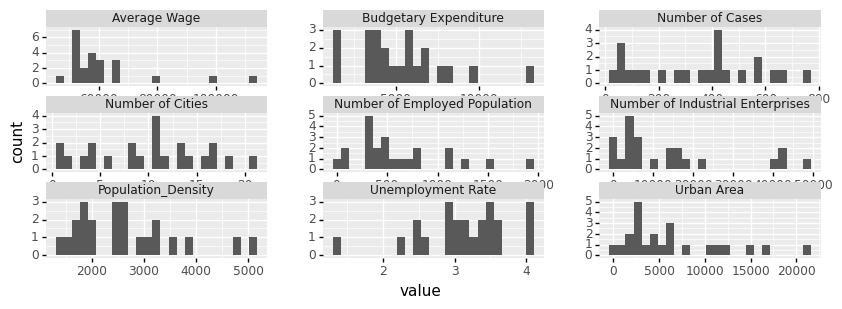

<ggplot: (8769232144391)>

In [61]:
d = train_X.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [271]:
dat=dat.replace({'province':{'Beijing':'North', 'Tianjin':'North', 'Hebei':'North', 
                         'Shanxi':'North','Inner Mongolia':'North'}})
dat=dat.replace({'province':{'Liaoning':'Northeast', 'Jilin':'Northeast', 'Heilongjiang':'Northeast'}})
dat=dat.replace({'province':{'Shanghai':'East','Jiangsu':'East','Zhejiang':'East','Anhui':'East',
                       'Fujian':'East','Jiangxi':'East','Shandong':'East'}}) 
dat=dat.replace({'province':{'Henan':'South Central','Hubei':'South Central','Hunan':'South Central','Guangdong':'South Central',
                             'Guangxi':'South Central','Hainan':'South Central'}})
dat=dat.replace({'province':{'Chongqing':'Southwest','Sichuan':'Southwest','Guizhou':'Southwest','Yunnan':'Southwest','Tibet':'Southwest'}})
dat=dat.replace({'province':{'Shaanxi':'Northwest','Gansu':'Northwest','Qinghai':'Northwest','Ningxia':'Northwest','Xinjiang':'Northwest'}})
dat.head()



,province,Year,Gross Product,Number of Industrial Enterprises,Average Wage,Budgetary Expenditure,Population_Density,Urban Area,Number of Cities,Unemployment Rate,Population,Number of Employed Population,Number of Cases
31,North,2015,24779.1,3548.0,111390.0,5737.70,1541.0,12187.0,1.0,1.4,2188,777.3,64.0
32,North,2015,10879.5,5525.0,80090.0,3232.35,3492.0,2506.0,1.0,3.5,1439,294.8,60.0
33,North,2015,26398.4,15295.0,50921.0,5632.19,2646.0,6399.0,11.0,3.6,7345,643.6,266.0
34,North,2015,11836.4,3845.0,51803.0,3422.97,3920.0,2837.0,11.0,3.5,3519,440.3,409.0
35,North,2015,12949.0,4404.0,57135.0,4252.96,1629.0,5373.0,9.0,3.6,2440,298.3,137.0


In [272]:
dat['North'] = 1*(dat['province'] == "North")
dat['East'] = 1*(dat['province'] == "East")
dat['SouthCentral'] = 1*(dat['province'] == "South Central")
dat['Southwest'] = 1*(dat['province'] == "Southwest")
dat['Northwest'] = 1*(dat['province'] == "Northwest")
dat['Northeast'] = 1*(dat['province'] == "Northeast")
dat=dat.drop(columns=["province"])
dat.head()

,Year,Gross Product,Number of Industrial Enterprises,Average Wage,Budgetary Expenditure,Population_Density,Urban Area,Number of Cities,Unemployment Rate,Population,Number of Employed Population,Number of Cases,North,East,SouthCentral,Southwest,Northwest,Northeast
31,2015,24779.1,3548.0,111390.0,5737.70,1541.0,12187.0,1.0,1.4,2188,777.3,64.0,1,0,0,0,0,0
32,2015,10879.5,5525.0,80090.0,3232.35,3492.0,2506.0,1.0,3.5,1439,294.8,60.0,1,0,0,0,0,0
33,2015,26398.4,15295.0,50921.0,5632.19,2646.0,6399.0,11.0,3.6,7345,643.6,266.0,1,0,0,0,0,0
34,2015,11836.4,3845.0,51803.0,3422.97,3920.0,2837.0,11.0,3.5,3519,440.3,409.0,1,0,0,0,0,0
35,2015,12949.0,4404.0,57135.0,4252.96,1629.0,5373.0,9.0,3.6,2440,298.3,137.0,1,0,0,0,0,0


In [273]:
for col in ['Gross Product', 'Number of Industrial Enterprises','Average Wage','Budgetary Expenditure',
           'Population_Density','Urban Area','Number of Cities','Unemployment Rate','Number of Cases',
           'Number of Employed Population']:
    dat[col] = dat[col].astype('int')
    
     

In [150]:
dta=dat.drop(columns=["North","East","SouthCentral","Southwest","Northwest","Population"])
dta

,Year,Gross Product,Number of Industrial Enterprises,Average Wage,Budgetary Expenditure,Population_Density,Urban Area,Number of Cities,Unemployment Rate,Number of Employed Population,Number of Cases
31,2015,24779,3548,111390,5737,1541,12187,1,1,777,64
32,2015,10879,5525,80090,3232,3492,2506,1,3,294,60
33,2015,26398,15295,50921,5632,2646,6399,11,3,643,266
34,2015,11836,3845,51803,3422,3920,2837,11,3,440,409
35,2015,12949,4404,57135,4252,1629,5373,9,3,298,137
36,2015,20210,12304,52332,4481,1590,14316,14,3,618,89
37,2015,10018,5682,51558,3217,3193,3668,8,3,325,82
38,2015,11690,4162,48881,4020,5504,2578,12,4,433,124
39,2015,26887,8994,109174,6191,3809,6341,1,4,637,40
40,2015,71255,48488,66196,9687,2034,15111,13,3,1552,570


In [274]:
y = dat[['Gross Product']]
X = dat.drop(columns=['Gross Product'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .2,random_state=202011)

In [275]:
print(train_X.shape[0]/dat.shape[0])
print(test_X.shape[0]/dat.shape[0])

0.7741935483870968
0.22580645161290322


In [276]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

In [277]:
use_metrics = ["neg_mean_squared_error"]

In [278]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [279]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [280]:
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [281]:
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [282]:
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [283]:
lm_scores

{'fit_time': array([0.08189917, 0.0043211 , 0.00393701, 0.00457287, 0.00679207]),
 'score_time': array([0.01236391, 0.00354671, 0.00316405, 0.00390005, 0.00435972]),
 'test_neg_mean_squared_error': array([-45093536.79624121, -77948300.1775666 , -91352427.30719033,
        -37148388.46268468, -12391501.82822119])}

In [284]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,4.509354e+07
1,lm,7.794830e+07
2,lm,9.135243e+07
3,lm,3.714839e+07
4,lm,1.239150e+07
5,knn,1.925237e+08
6,knn,3.315953e+07
7,knn,1.290263e+08
8,knn,2.370341e+07
9,knn,2.321037e+08


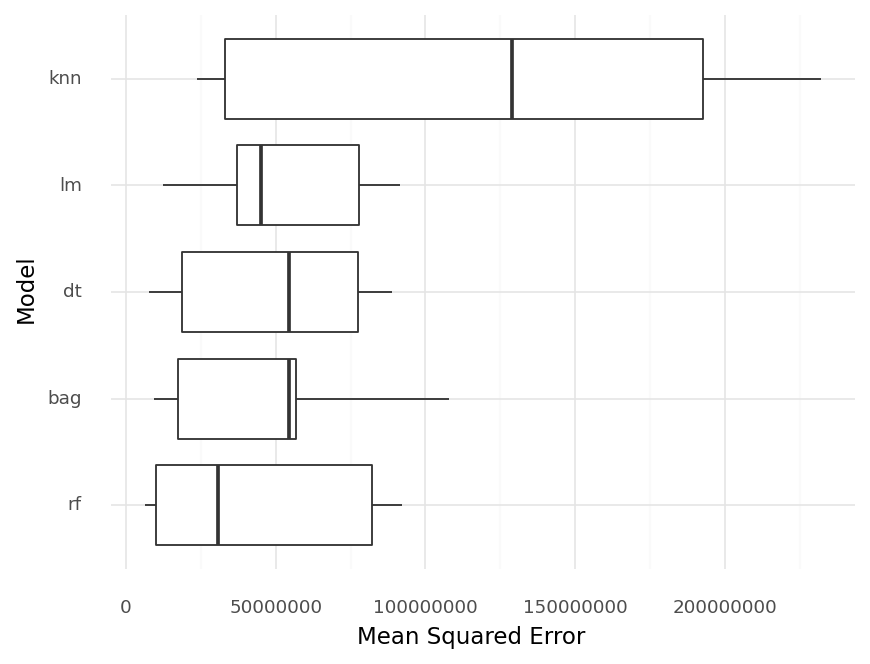

<ggplot: (8769232243716)>

In [285]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

In [286]:
RF().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [287]:
rf_params = {'max_depth':[1,2,3],
             'n_estimators':[100,500,1000],
              'max_features': [1,2]} # Only have three total. 
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [288]:
tune_rf.fit(train_X,train_y) 

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3], 'max_features': [1, 2],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [289]:
tune_rf.best_params_

{'max_depth': 3, 'max_features': 2, 'n_estimators': 1000}

In [290]:
tune_rf.best_score_

-88789437.4239963

In [291]:
rf_mod = tune_rf.best_params_

In [292]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)


pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [293]:
# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [1, 2, 3],
                          'model__n_estimators': [500, 1000, 1250]}],
             scoring='neg_mean_squared_error')

In [294]:
search.best_score_

-27332535.740570076

In [295]:
search.best_params_

{'model': LinearRegression()}

In [296]:
lr_mod = search.best_estimator_

In [297]:
pred_y = search.predict(test_X)

In [298]:
m.mean_squared_error(test_y,pred_y)

7076099.612684629

In [299]:
m.r2_score(test_y,pred_y)

0.7089312119390554

In [303]:
vi = permutation_importance(lr_mod,train_X,train_y,n_repeats=25)

In [304]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,Number of Employed Population,0.594474,0.131452,0.331570,0.857378
1,Number of Industrial Enterprises,0.166778,0.039476,0.087827,0.245729
2,Budgetary Expenditure,0.128048,0.025737,0.076573,0.179523
3,Population,0.092964,0.019174,0.054616,0.131311
4,Urban Area,0.015190,0.004163,0.006865,0.023515
5,SouthCentral,0.004434,0.001476,0.001481,0.007386
6,Unemployment Rate,0.003577,0.001327,0.000923,0.006232
7,Northeast,0.002086,0.001094,-0.000102,0.004275
8,East,0.000587,0.000593,-0.000598,0.001773
9,Average Wage,0.000551,0.000593,-0.000634,0.001737


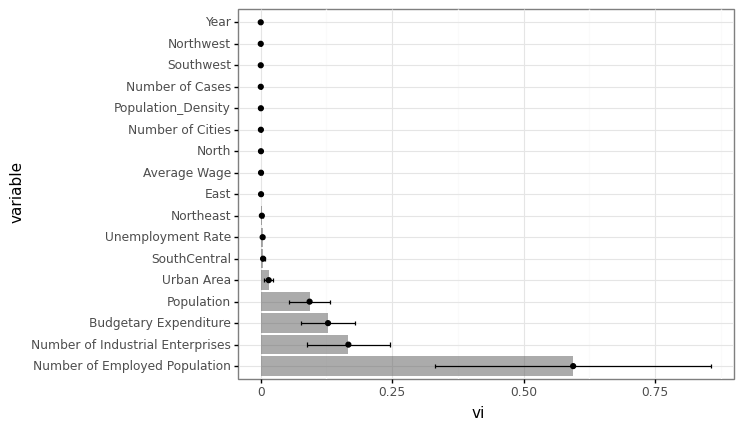

<ggplot: (8769210890105)>

In [307]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip()
)

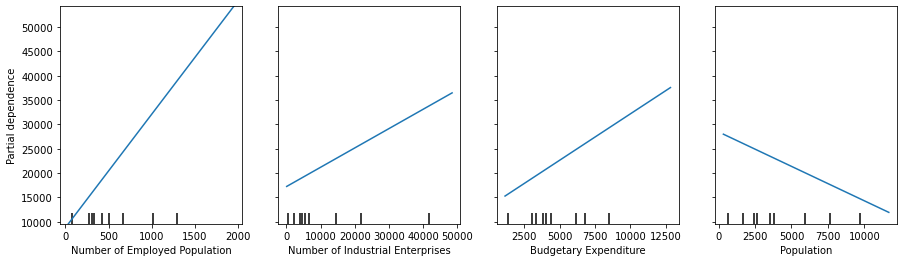

In [231]:
# Target specific features
features = ['Number of Employed Population','Number of Industrial Enterprises','Budgetary Expenditure','Population']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    lr_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)
# display.figure_.set_figwidth(15)
# display.figure_.set_figheight(4)

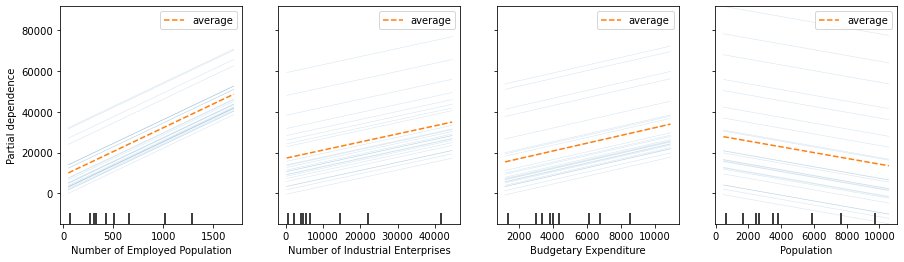

In [232]:
features = ['Number of Employed Population','Number of Industrial Enterprises','Budgetary Expenditure','Population']
fig, ax = plt.subplots(figsize=(15, 4))
display = PartialDependenceDisplay.from_estimator(
    lr_mod,
    train_X,
    features,
    kind="both", # "average" = just PDP, "individual" = just ICE
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    n_cols=len(features),
    ax = ax
)
display.figure_.subplots_adjust(hspace=0.3)

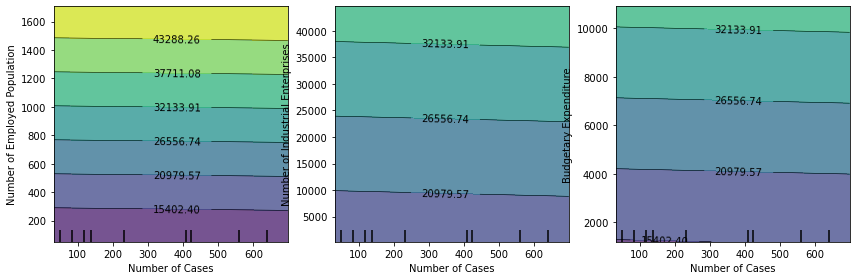